In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

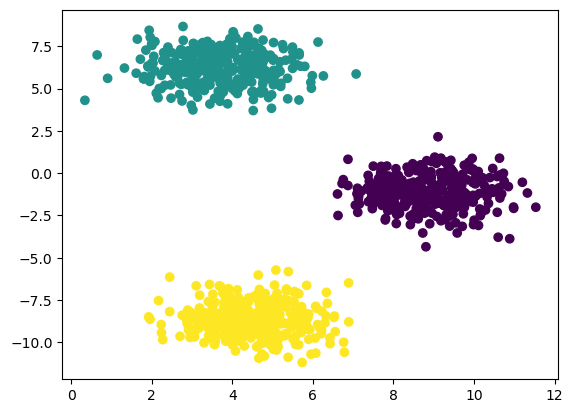

In [4]:
plt.scatter(X[:,0], X[:,1],c=y)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state=42)

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

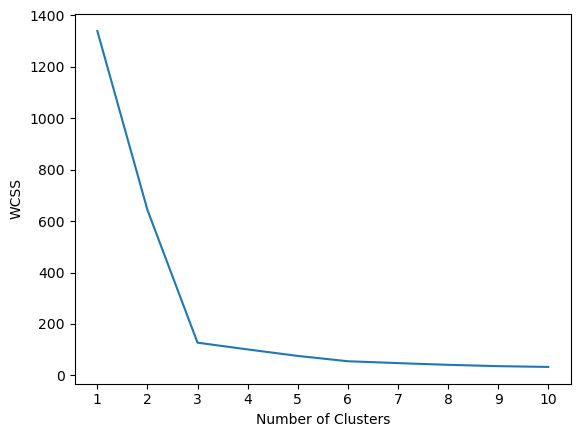

In [12]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3, init="k-means++")

kmeans.fit_predict(X_train_scaled)

y_pred = kmeans.predict(X_test_scaled)

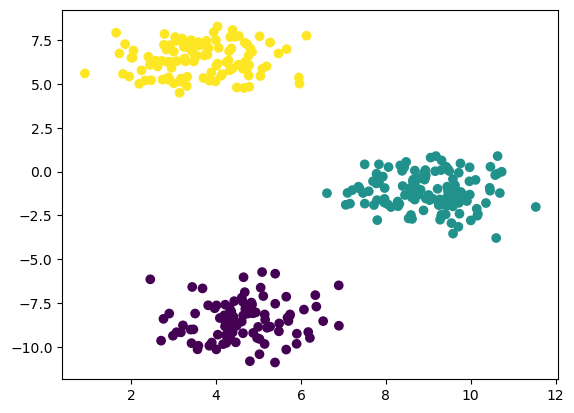

In [14]:
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred)

In [15]:
!pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [17]:
from kneed import KneeLocator

k1=KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
k1.elbow

3

In [21]:
from sklearn.metrics import silhouette_score

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.5576180208635635,
 0.7566642101284018,
 0.6559823701127547,
 0.5538073514493728,
 0.4655071936880346,
 0.44422695009586427,
 0.4396831540558656,
 0.4011040769661974,
 0.3922993908766045]

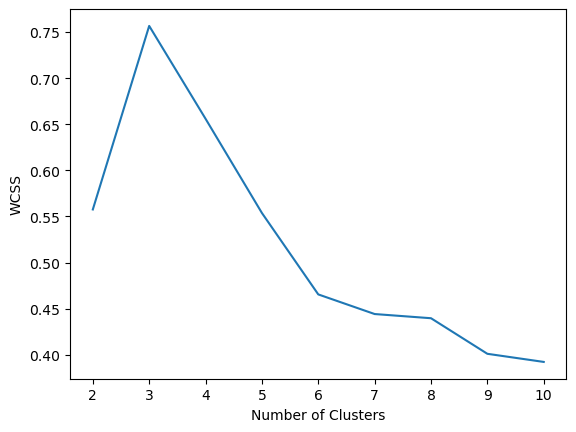

In [22]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

based on this curve, k value should be 3